<a href="https://colab.research.google.com/github/Eazlizy/stroke-prediction-and-prevention-dataset/blob/main/stroke_prediction_and_prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Stroke Prediction and Prevention##

In [1]:
import pandas as pd

# Load the dataset
data_url = "https://raw.githubusercontent.com/Eazlizy/stroke-prediction-and-prevention-dataset/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data_url)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Save preprocessed data to a new file
df.to_csv("preprocessed_data.csv", index=False)


Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [2]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check for outliers
# Use box plots or IQR method to detect outliers and handle them accordingly

# Save cleaned data to a new file
df.to_csv("cleaned_data.csv", index=False)


Duplicate Rows: 0


Summary Statistics:
                  id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.0900

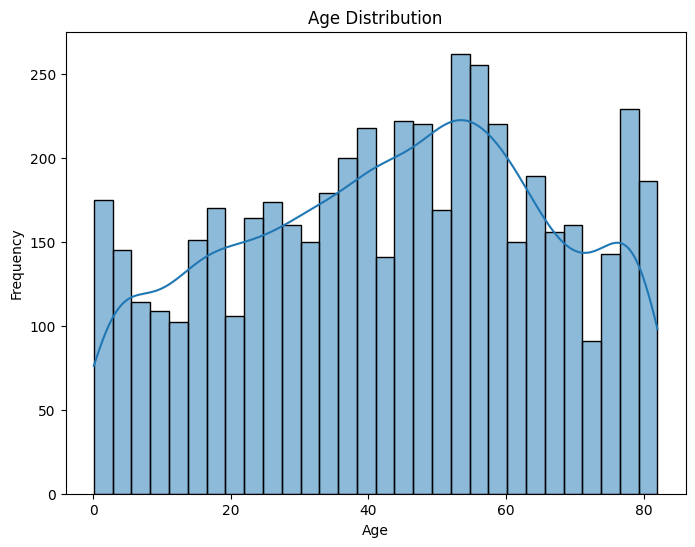

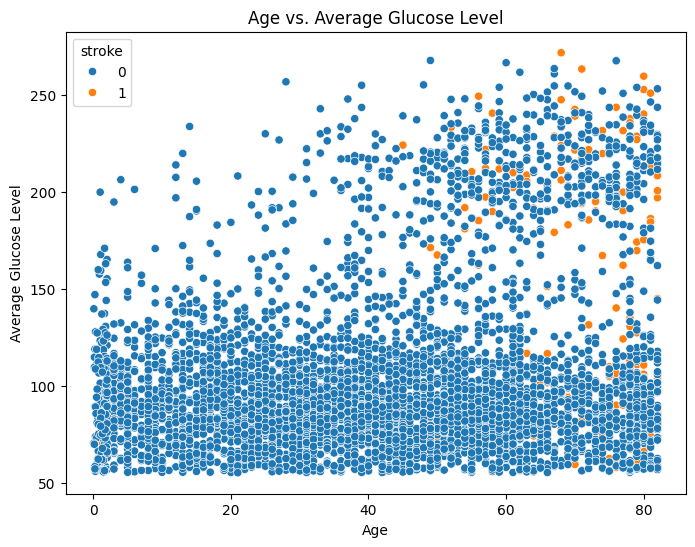

<ipython-input-3-c6383abc4fcf>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


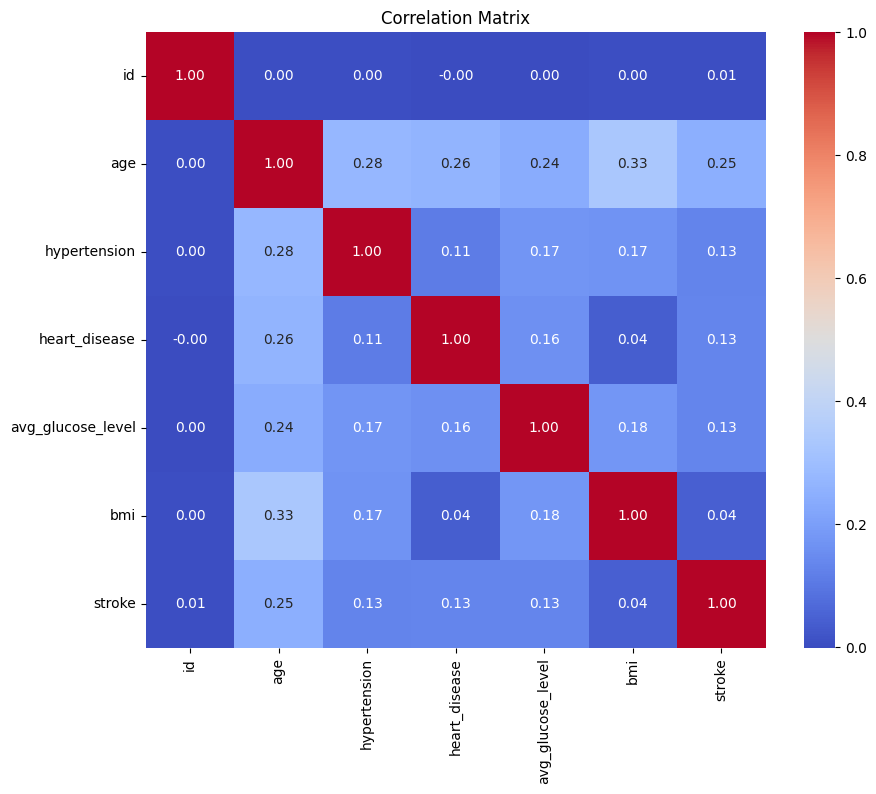

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

# Visualize key variables and relationships
# Histogram of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of age vs. average glucose level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.title('Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
data_url = "https://raw.githubusercontent.com/Eazlizy/stroke-prediction-and-prevention-dataset/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(data_url)

# Split the data into features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

# Apply the same imputer to the test set
X_test_imputed = imputer.transform(X_test)

# Predict on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9403131115459883
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 61   1]]


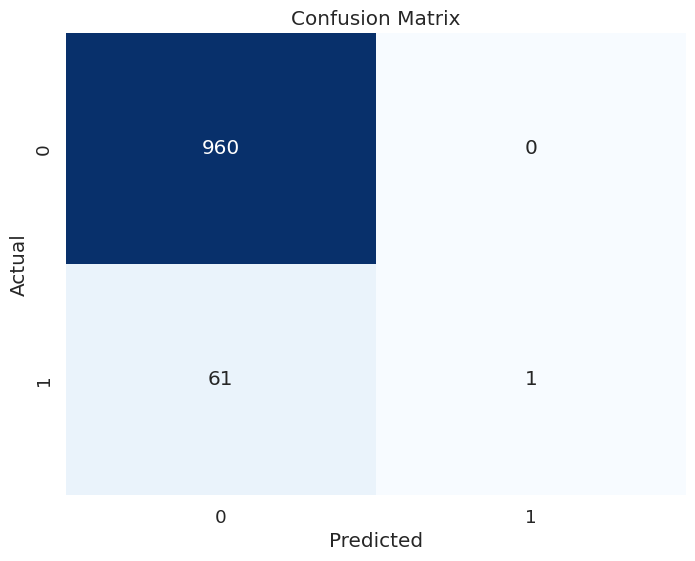

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = np.array([[960, 0],
                        [61, 1]])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


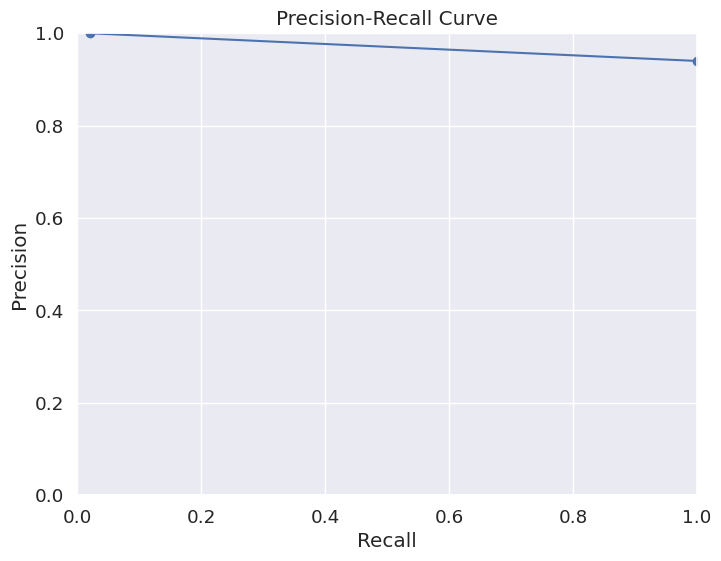

In [13]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score from the classification report
precision = [0.94, 1.00]
recall = [1.00, 0.02]

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()


In [14]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.7 MB/s eta 0:00:00


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/Eazlizy/stroke-prediction-and-prevention-dataset/main/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(url)

# Drop rows with missing values for simplicity
data.dropna(inplace=True)

# Convert categorical variables into numeric format using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Stroke Risk Prediction Dashboard"),
    html.Label("Select Variable:"),
    dcc.Dropdown(
        id='variable-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns],
        value=data.columns[0]
    ),
    dcc.Graph(id='histogram')
])

# Define callback function to update histogram based on dropdown selection
@app.callback(
    Output('histogram', 'figure'),
    [Input('variable-dropdown', 'value')]
)
def update_histogram(selected_variable):
    fig = px.histogram(data, x=selected_variable, title=f"Distribution of {selected_variable}")
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>